In [1]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
print(matplotlib.__version__)

3.5.3


In [2]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans

In [3]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
print(X)

[[ 6.69786996e-01  3.59540802e+00]
 [-2.02396992e+00  7.99569054e+00]
 [ 1.43289271e+00  4.37679234e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 1.71444449e+00  5.02521524e+00]
 [ 7.43873988e-01  4.12240568e+00]
 [-2.04363942e+00  4.06392123e+00]
 [-6.78603291e-01  7.88799076e+00]
 [-4.74920358e-02  5.47425256e+00]
 [-1.46976488e+00  7.69183251e+00]
 [-8.64176859e-01  6.86528639e+00]
 [-1.84838498e+00  6.90859736e+00]
 [-1.27182547e+00  7.13460392e+00]
 [-9.34289778e-01  7.73253222e+00]
 [-7.34157408e-01  7.44484466e+00]
 [ 3.18515794e+00  8.90082233e-02]
 [ 1.35139348e+00  2.06383637e+00]
 [-9.70171483e-02  3.48456995e+00]
 [-1.93150361e+00  2.93698060e+00]
 [ 2.73890793e+00  1.56768168e-01]
 [ 2.33812285e+00  3.43116792e+00]
 [-1.93673697e+00  7.57276799e+00]
 [-1.98885366e+00  3.24143178e+00]
 [ 2.33466499e+00 -2.40825518e-02]
 [ 4.38990142e-01  4.53592883e+00]
 [-1.58597553e+00  2.51979529e+00]
 [-3.73138797e-01  3.80619114e+00]
 [ 7.67522789e-01  4.39759671e+00]
 [ 2.94821884e+00  2

Text(0, 0.5, 'X[1]')

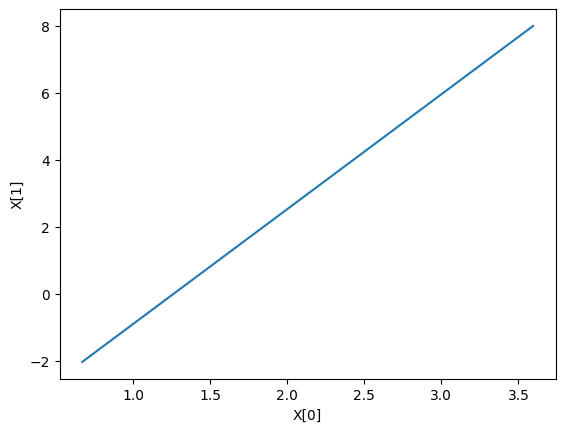

In [4]:
plt.plot(X[0], X[1])
plt.xlabel("X[0]")
plt.ylabel("X[1]")

In [5]:
WCSS = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k) #
    kmeans.fit(X) # training algorithm
    WCSS.append(kmeans.inertia_)  # Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

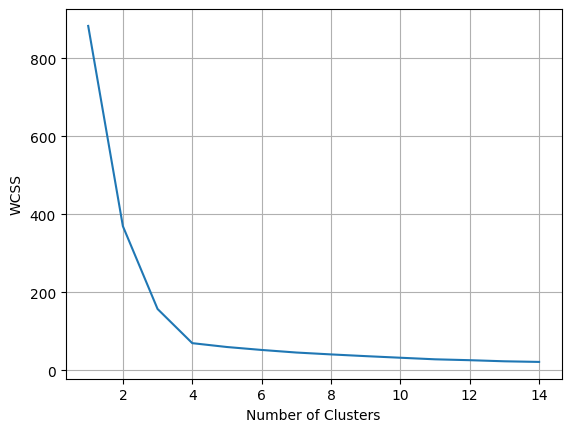

In [6]:
plt.plot(range(1,15),WCSS)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [7]:
K = 4 # Based on elbow plot
kmeans = KMeans(n_clusters = K ,max_iter=300, random_state= 1) # dividing into K groups
clusters = kmeans.fit_predict(X) # teaching
labels = kmeans.labels_ # for every point has ID cluster
centroids = kmeans.cluster_centers_ # central points of clusters
print(centroids[:,0])

[ 1.97918933  0.83044547 -1.27208964 -1.5772186 ]


In [8]:
h = 0.1
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

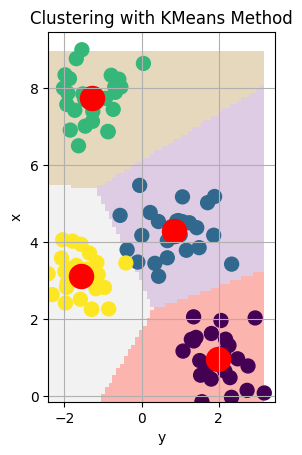

In [9]:
#plt.figure(1 , figsize = (15 , 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel1, origin='lower')

plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
plt.scatter(x=centroids[:,0], y=centroids[:,1], s=300 , c='red')

plt.title("Clustering with KMeans Method")
plt.ylabel('x')
plt.xlabel('y')
plt.grid()
plt.show()
